# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 12


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash;  40 баллов
* Задача 2 &mdash;  60 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash;  20 баллов
* Задача 4 &mdash;  40 баллов







-----

In [1]:
# Bot check

# HW_ID: phds_hw12
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Импорты из sklearn:

In [83]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

## Задача 1

Реализуйте функции:

- скользящего среднего
- экспоненциального сглаживания
- двойного эскпоненциального сглаживания (метод Хольта)

Визуализируйте результаты работы функций.




### 0. Загрузка данных

#### **Профиль биология**

В этом домашнем задании мы будем работать с данными о сердцебиении человека во время сна. Скачать и изучить подробнее [здесь](https://www.kaggle.com/datasets/jacekmakola/goodnight1). 

In [96]:
data = pd.read_csv("C:/Users/админ/Desktop/МатСтаты/датасеты/hrb_sample_1.csv")
data

,Name,Sport,Date,Start time,Duration,Total distance (km),Average heart rate (bpm),Average speed (km/h),Max speed (km/h),Average pace (min/km),...,Training load,Ascent (m),Descent (m),Notes,Height (cm),Weight (kg),HR max,HR sit,VO2max,Unnamed: 25
0,Jacek Makola,OTHER_INDOOR,03-08-2019,22:53:24,07:50:53,NaN,54,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,182.0,75.0,178.0,55.0,49.0,NaN
1,Sample rate,Time,HR (bpm),Speed (km/h),Pace (min/km),Cadence,Altitude (m),Stride length (m),Distances (m),Temperatures (C),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,00:00:00,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,00:00:01,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,00:00:02,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28251,NaN,07:50:49,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28252,NaN,07:50:50,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28253,NaN,07:50:51,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28254,NaN,07:50:52,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Формат данных достаточно специфичен. Очистим нашу таблицу от ненужной информации.

In [97]:
data = pd.DataFrame(data.values, columns=data.loc[1])
data = data.drop(0)
data = data.drop(1)
data.tail()

1,Sample rate,Time,HR (bpm),Speed (km/h),Pace (min/km),Cadence,Altitude (m),Stride length (m),Distances (m),Temperatures (C),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28251,NaN,07:50:49,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28252,NaN,07:50:50,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28253,NaN,07:50:51,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28254,NaN,07:50:52,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28255,NaN,07:50:53,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Уберем лишние колонки.

In [98]:
data = data[['Time', 'HR (bpm)']]

Колонку `Time` преобразуем к правильному типу данных и поставим вместо индексов.

In [99]:
data["Time"] = pd.to_datetime(data['Time'])
data = data.set_index('Time')

C:\Users\админ\AppData\Local\Temp\ipykernel_17832\3228257617.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Time"] = pd.to_datetime(data['Time'])


Посмотрим, в каком формате хранятся данные о сердцебиении.

In [100]:
type(data['HR (bpm)'][0])

C:\Users\админ\AppData\Local\Temp\ipykernel_17832\3586556287.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  type(data['HR (bpm)'][0])


str

Переведите значения `HR (bpm)` к целым числам.

In [101]:
data['HR (bpm)'] = pd.to_numeric(data['HR (bpm)'])

Визуализируйте, как изменяется таргет с течением времени. Какие зависимости вы можете увидеть?

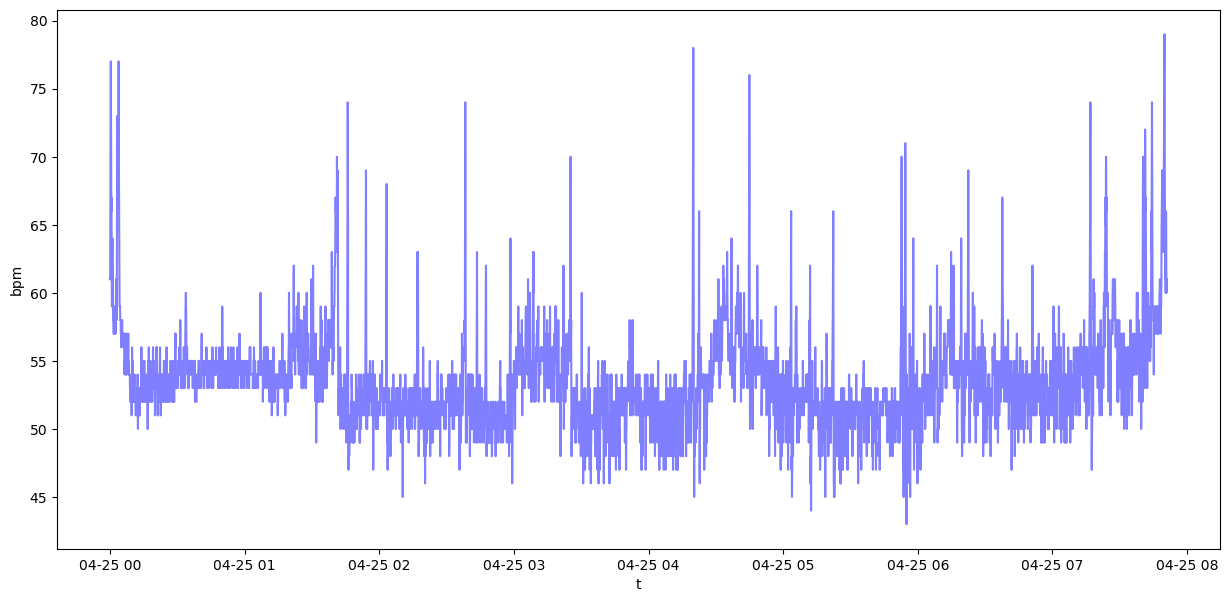

In [102]:
plt.figure(figsize=(15,7))
plt.plot(data['HR (bpm)'], color = 'blue', alpha = 0.5)
plt.xlabel('t')
plt.ylabel('bpm')
plt.show()

Кажется, что есть какая-то сезонность, т.к. есть пики, которые имеют период примерно в 1.5-2 часа.


### 1. Скользящее среднее

In [10]:
def moving_average(series:pd.Series, n:int)->pd.Series:
    '''
    series:pd.Series - исходные данные 
    n:int - величина скользящего окна

    output:pd.Series - сглаженные данные
    '''

    data_rolling = series.rolling(window= n).mean().shift(1, axis=0)
    
    return data_rolling

Нарисуйте на одном графике исходные данные и обработанные скользящим средним. Рассмотрите минимум **два** разных `n` и обоснуйте свой выбор этих значений.

*Замечание: при корректной реализации функции первые элементы превратятся в NaN, поэтому рисовать график нужно для `series[n:]`*

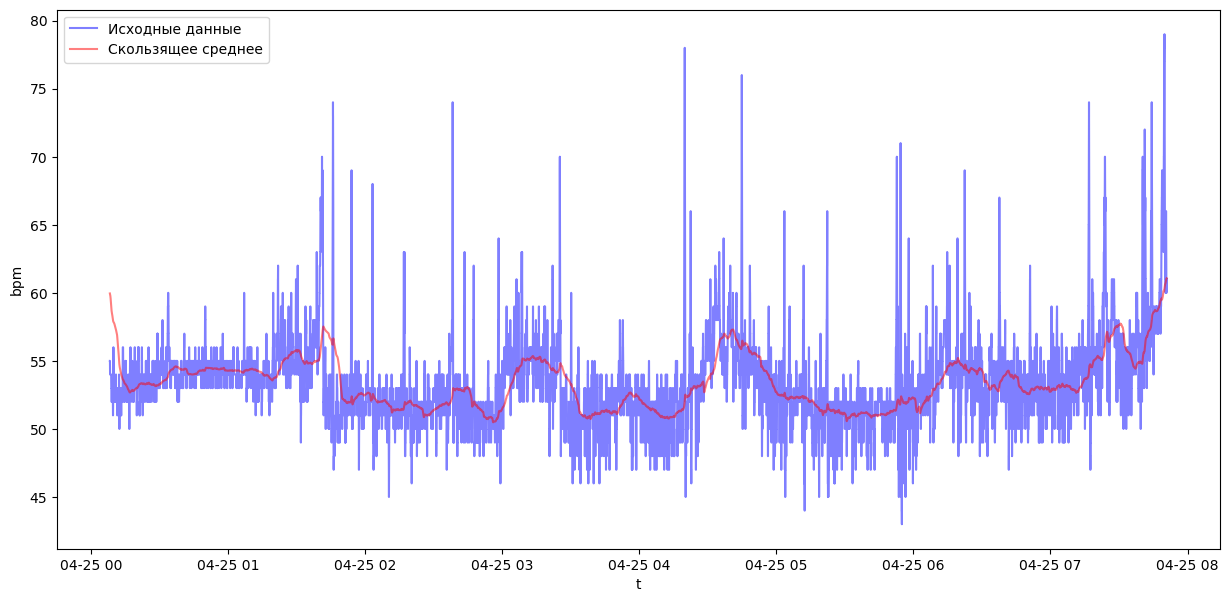

In [11]:
n = 500
plt.figure(figsize=(15,7))
plt.plot(data['HR (bpm)'][n:], color = 'blue', alpha = 0.5, label = 'Исходные данные')
plt.plot(moving_average(data, n)[n:], color = 'r', alpha =0.5, label = 'Скользящее среднее')
plt.xlabel('t')
plt.ylabel('bpm')
plt.legend()
plt.show()

### 2. Экспоненциальное сглаживание

In [11]:
def exponential_smoothing(series:pd.Series, alpha:float)->pd.Series:
    '''
    series:pd.Series - исходные данные 
    alpha:float - сглаживающий фактор
    '''
    exp_smth = pd.Series(index=series.index) 
    exp_smth[series.index[0]] = series.iloc[0]
    for i in range(1, len(series)):
        exp_smth[series.index[i]] = alpha * series.iloc[i] + (1 - alpha)*exp_smth[series.index[i-1]]
    return exp_smth

Нарисуйте на одном графике исходные данные и обработанные функцией экпоненциального сглаживания. Рассмотрите минимум **два** разных `alpha`. Следите за аккуратностью графика.


C:\Users\админ\AppData\Local\Temp\ipykernel_9532\944065598.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  exp_smth[series.index[0]] = series.iloc[0]
C:\Users\админ\AppData\Local\Temp\ipykernel_9532\944065598.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  exp_smth[series.index[i]] = alpha * series.iloc[i] + (1 - alpha)*exp_smth[series.index[i-1]]


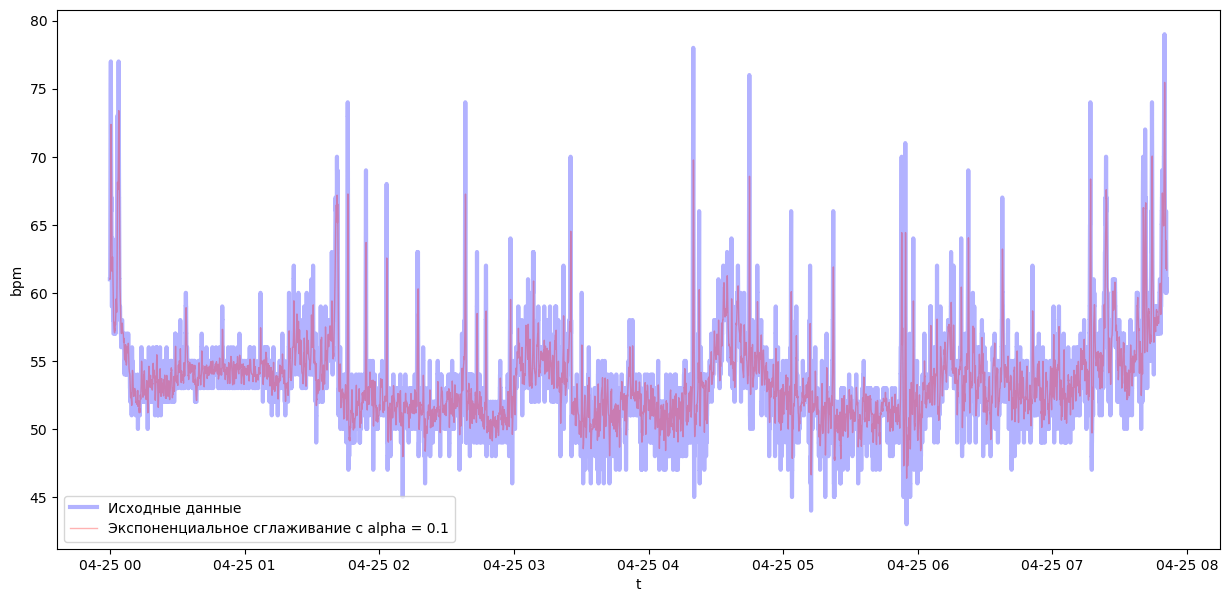

In [13]:
alpha1 = 0.1
alpha2 = 0.01
plt.figure(figsize=(15,7))
plt.plot(data['HR (bpm)'], color = 'blue', lw = 3, alpha =0.3, label = 'Исходные данные')
plt.plot(exponential_smoothing(data, alpha1), color = 'r', alpha =0.3, lw = 1, label = 'Экспоненциальное сглаживание c alpha = 0.1')
plt.xlabel('t')
plt.ylabel('bpm')
plt.legend()
plt.show()

C:\Users\админ\AppData\Local\Temp\ipykernel_9532\944065598.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  exp_smth[series.index[0]] = series.iloc[0]
C:\Users\админ\AppData\Local\Temp\ipykernel_9532\944065598.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  exp_smth[series.index[i]] = alpha * series.iloc[i] + (1 - alpha)*exp_smth[series.index[i-1]]


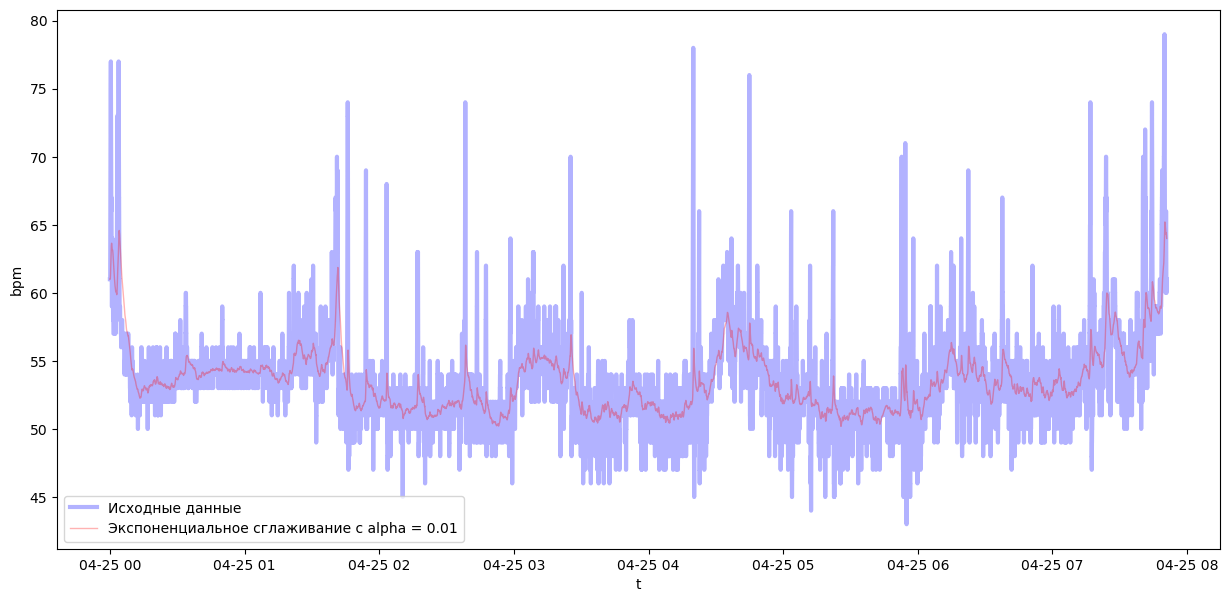

In [14]:
alpha1 = 0.1
alpha2 = 0.01
plt.figure(figsize=(15,7))
plt.plot(data['HR (bpm)'], color = 'blue', lw = 3, alpha =0.3, label = 'Исходные данные')
plt.plot(exponential_smoothing(data, alpha2), color = 'r', alpha =0.3, lw = 1, label = 'Экспоненциальное сглаживание c alpha = 0.01')
plt.xlabel('t')
plt.ylabel('bpm')
plt.legend()
plt.show()

Аккуратность графика увеличивается с уменьшением $\alpha$, что логично, т.к. мы "забываем" моменты времени, которые были давно

(На одном графике плохо видно, поэтому на двух разных)

### 3. Двойное экспоненциальное сглаживание (метод Хольта)

In [12]:
def double_exponential_smoothing(series, alpha:float, beta:float)->pd.Series:
    '''
    series:pd.Series - исходные данные 
    alpha:float - сглаживающий фактор
    beta:float - сглаживающий фактор
    '''
    des = pd.Series(index=series.index)
    des[series.index[0]] = series.iloc[0]
    for i in range(1, len(series)):
        y = series.iloc[i]
        if i == 1:
            lvl, trnd = series.iloc[0], series.iloc[1] - series.iloc[0]
        last, lvl = lvl, alpha*y + (1 - alpha) * (lvl + trnd)

        trnd = beta*(lvl-last) + (1-beta) * trnd
        des[series.index[i]] = trnd + lvl
    return des

Нарисуйте на одном графике исходные данные и обработанные функцией двойного экпоненциального сглаживания. Рассмотрите минимум **три** разных пары `alpha` и `beta`. Следите за аккуратностью графика.

C:\Users\админ\AppData\Local\Temp\ipykernel_9532\1507379623.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  des[series.index[0]] = series.iloc[0]
C:\Users\админ\AppData\Local\Temp\ipykernel_9532\1507379623.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  des[series.index[i]] = trnd + lvl


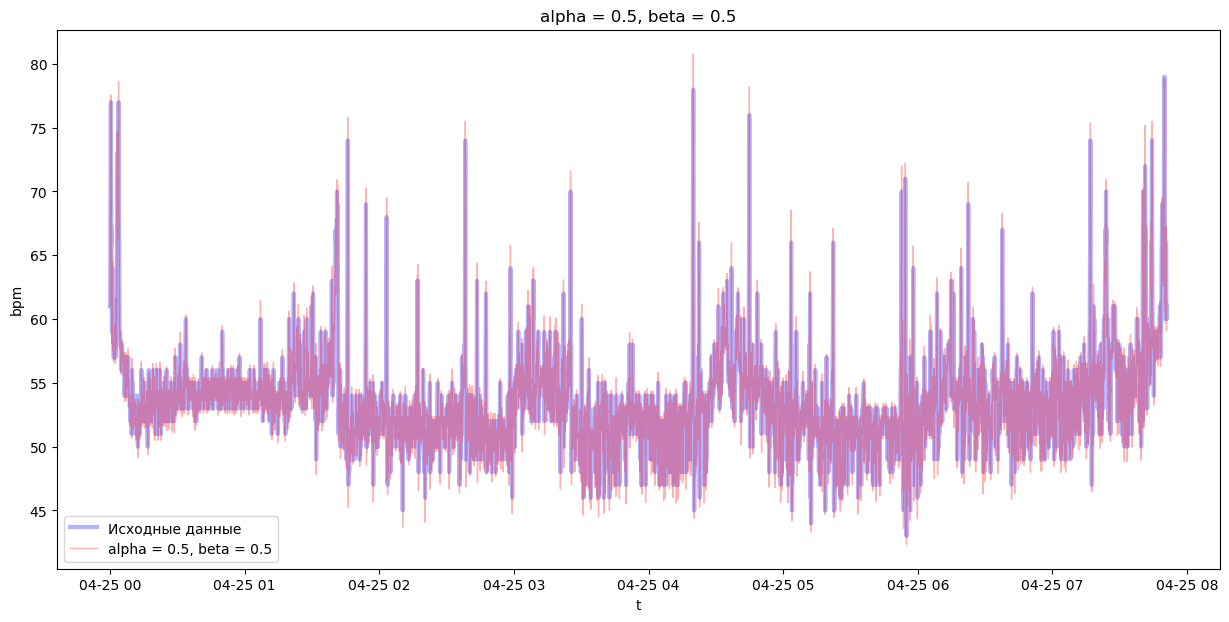

In [19]:
plt.figure(figsize=(15,7))
plt.plot(data['HR (bpm)'], color = 'blue', lw = 3, alpha =0.3, label = 'Исходные данные')
plt.plot(double_exponential_smoothing(data, 0.5, 0.5), color = 'r', alpha =0.3, lw = 1, label = 'alpha = 0.5, beta = 0.5')
plt.xlabel('t')
plt.ylabel('bpm')
plt.title('alpha = 0.5, beta = 0.5')
plt.legend()
plt.show()

C:\Users\админ\AppData\Local\Temp\ipykernel_21968\1507379623.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  des[series.index[0]] = series.iloc[0]
C:\Users\админ\AppData\Local\Temp\ipykernel_21968\1507379623.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  des[series.index[i]] = trnd + lvl


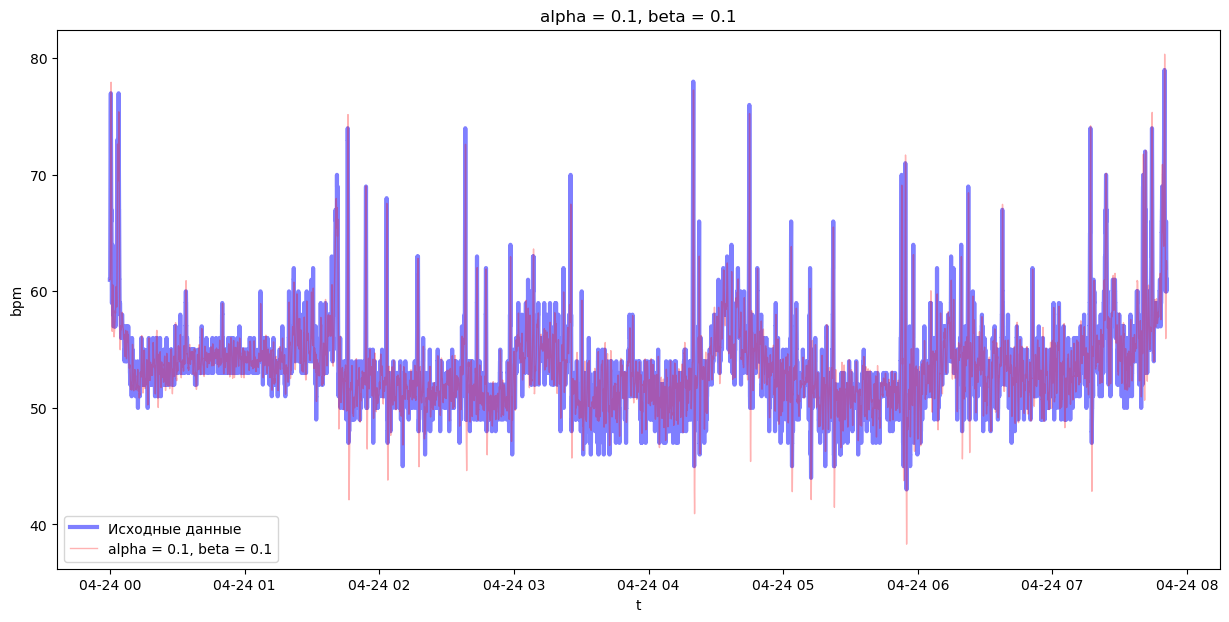

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(data['HR (bpm)'], color = 'blue', lw = 3, alpha =0.5, label = 'Исходные данные')
plt.plot(double_exponential_smoothing(data, 0.1, 0.1), color = 'r', alpha =0.3, lw = 1, label = 'alpha = 0.1, beta = 0.1')
plt.xlabel('t')
plt.ylabel('bpm')
plt.title('alpha = 0.1, beta = 0.1')
plt.legend()
plt.show()

C:\Users\админ\AppData\Local\Temp\ipykernel_21968\1507379623.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  des[series.index[0]] = series.iloc[0]
C:\Users\админ\AppData\Local\Temp\ipykernel_21968\1507379623.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  des[series.index[i]] = trnd + lvl


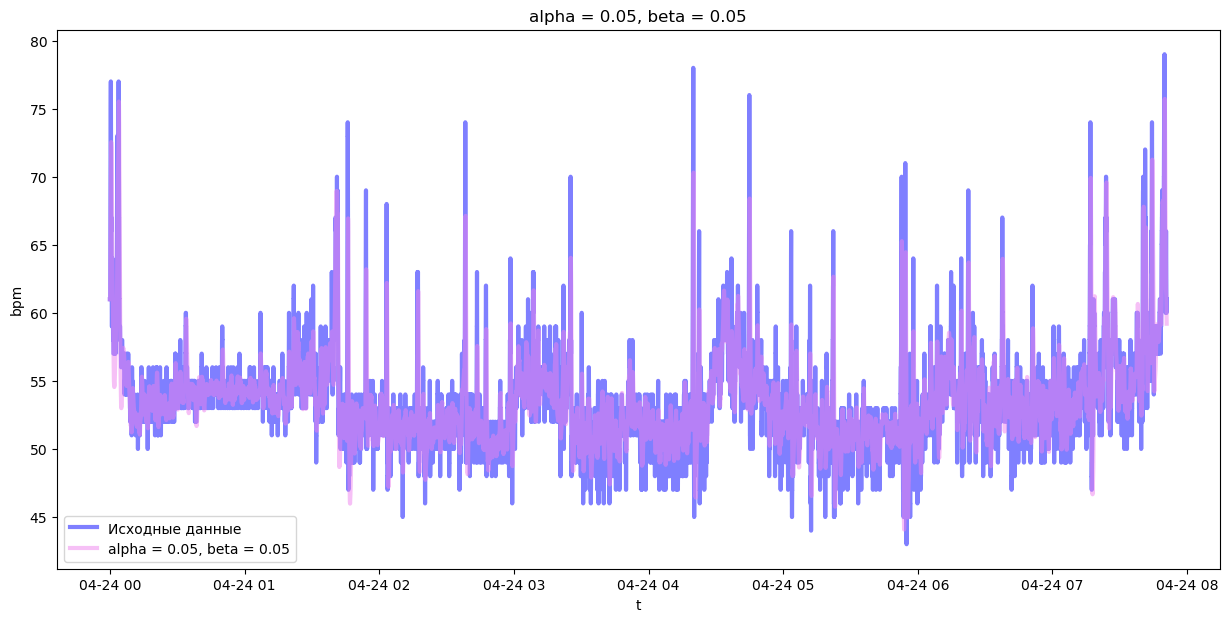

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(data['HR (bpm)'], color = 'blue', lw = 3, alpha =0.5, label = 'Исходные данные')
plt.plot(double_exponential_smoothing(data, 0.05, 0.05), color = 'violet', alpha =0.5, lw = 3, label = 'alpha = 0.05, beta = 0.05')
plt.xlabel('t')
plt.ylabel('bpm')
plt.legend()
plt.title('alpha = 0.05, beta = 0.05')
plt.show()

С уменьшением $\alpha$ и $\beta$ график становится более гладким. При этом сохраняется информация о колебаниях графика.

Первый параметр отвечает за сглаживание ряда вокруг тренда, а второй за сглаживание самого тренда.

## Задача 2.

Продолжайте работать с выбранными данными. Разбейте их таким образом, чтобы в тесте остались последние 20% измерений.



In [103]:
train = data.iloc[:-5650]
test = data.iloc[-5650:]

### 1. Baseline

В любой задаче машинного обучения сначала полезно строить простые модели, так называемые `baseline`. Сгенерируйте фичи из даты. Поясните свой выбор.

In [14]:
def create_date_features(date):
    """Создает фичи из даты"""
    row = {}
    row["minute"] = date.minute
    row["hour"] = date.hour
    return row

def create_only_date_train_features(y_series): 
    """
    Создает обучающий датасет из признаков, полученных из дат для y_series
    """
    time_features = pd.DataFrame(
    [create_date_features(date) for date in y_series.index] )
    return time_features, y_series

In [24]:
X_train, y_train = create_only_date_train_features(train)
X_test, y_test = create_only_date_train_features(test)

**Ответ:**

Пульс меняется достаточно быстро, поэтому имеет смысл рассмотреть короткие промежутки времени.

Обучите линейную регрессию с регуляризацией и случайный лес на ваших данных. 

In [121]:
lin = ElasticNet(l1_ratio=0.5)
forest = RandomForestRegressor(random_state=42)
#обучаем
lin.fit(X_train, y_train)
forest.fit(X_train, y_train)
#предсказываем
lin_pred = lin.predict(X_test)
forest_pred = forest.predict(X_test)

C:\Users\админ\AppData\Local\Temp\ipykernel_21968\2305457391.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


Визуализируйте полученные прогнозы.

In [15]:
def plot_results(y_to_train, y_to_test, y_forecast, name): 
    """
    Функция для визуализации временного ряда и предсказания.
    Параметры:
        - y_to_train: pd.Series
            Временной ряд, на котором обучалась модель.
        - y_to_test: pd.Series
            Временной ряд, который предсказывает модель.
        - y_forecast: array
            Предсказания модели.
        - plot_conf_int: bool
            Надо ли строить предсказательного интервал.
        - left_bound: array
            Левая граница предсказательного интервала.
        - right_bound: array
            Правая граница предсказательного интервала.
    """
    plt.figure(figsize=(15, 5))
    plt.title("Количество ударов сердца в минуту" + name, fontsize=15) 
    plt.plot(y_to_train, label="train")
    plt.plot(y_to_test, label="test")
    plt.plot(y_to_test.index, y_forecast, label="prediction") 
    plt.legend()
    plt.show()

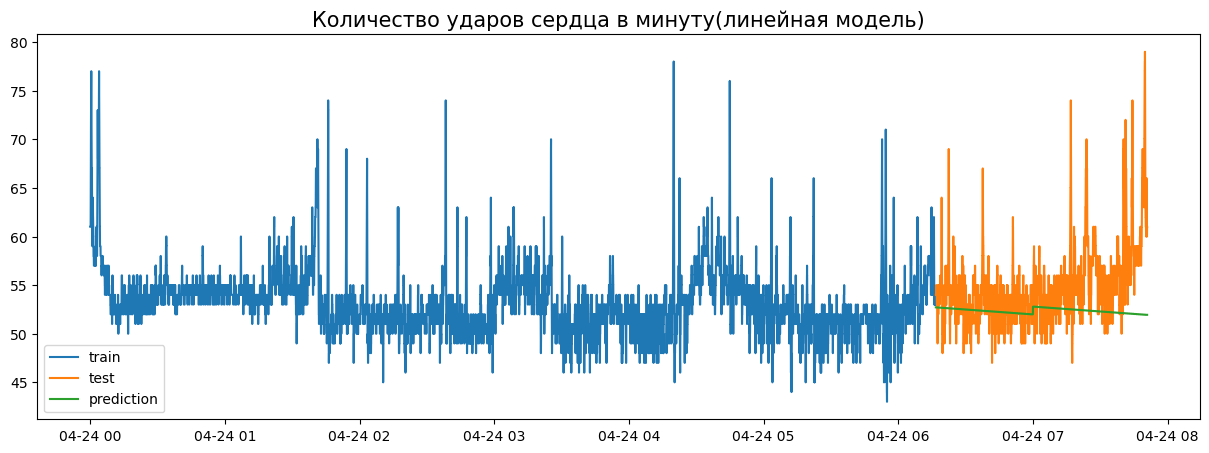

In [123]:
plot_results(y_train, y_test, lin_pred, name = '(линейная модель)')

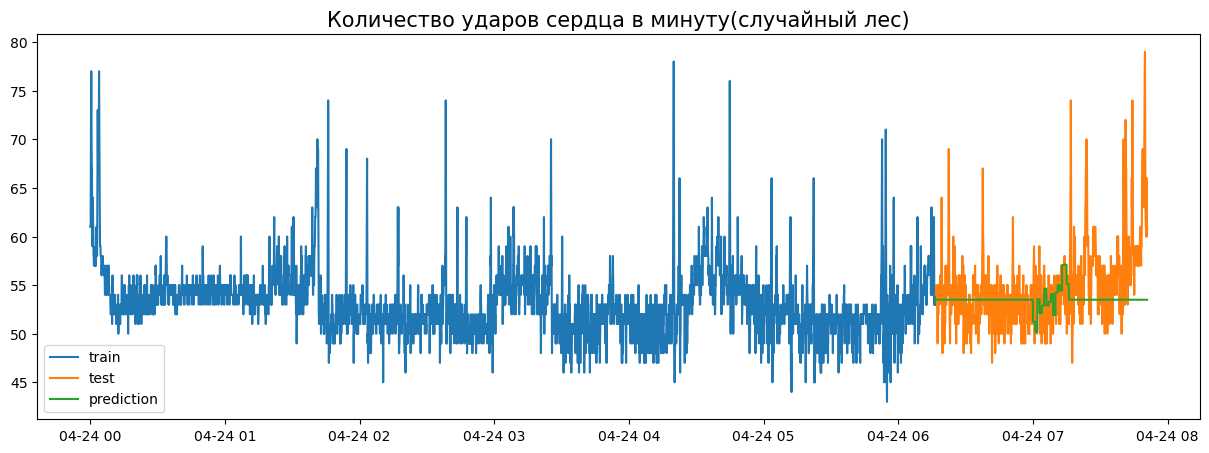

In [124]:
plot_results(y_train, y_test, forest_pred, name = '(случайный лес)')

Посчитайте метрики.

In [125]:
print(f'Случайный лес \n MAE: {round(mean_absolute_error(y_test, forest_pred), 6)} \n MSE: {round(mean_squared_error(y_test, forest_pred), 6)} \n MAPE: {round(mean_absolute_percentage_error(y_test, forest_pred), 6)} \n')
print(f'Линейная регрессия \n MAE: {round(mean_absolute_error(y_test, lin_pred), 6)} \n MSE: {round(mean_squared_error(y_test, lin_pred), 6)} \n MAPE: {round(mean_absolute_percentage_error(y_test, lin_pred), 6)} \n')


Случайный лес 
 MAE: 2.800218 
 MSE: 18.243051 
 MAPE: 0.04833 

Линейная регрессия 
 MAE: 3.233237 
 MSE: 23.090016 
 MAPE: 0.055396 



### 2. Рекурсивная стратегия

Обучите линейную регрессию с регуляризацией и случайный лес используя рекурсивную стратегию. 



In [16]:
def recursive_prediction(
    model, test_dates, y_to_train, features_creation_function
):
    """
    Функция для рекурсивного предсказания для дат,
    указанных в test_dates.

    Параметры:
        - model
            МЛ-модель.
        - test_dates
            массив с датами, в которые надо сделать предсказания.
        - features_creation_function
            функция для создания тестовых признаков
    """
    predictions = []
    previous_y = list(y_to_train)

    for date in test_dates:
        row = features_creation_function(date, previous_y)
        curr_test = pd.DataFrame([row])
        curr_prediction = model.predict(curr_test)[0]
        previous_y.append(curr_prediction)
        predictions.append(curr_prediction)
    return np.array(predictions)

In [127]:
lin = ElasticNet()
forest = RandomForestRegressor()

lin.fit(X_train, y_train)
forest.fit(X_train, y_train)

C:\Users\админ\AppData\Local\Temp\ipykernel_21968\730873384.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


RandomForestRegressor()

In [128]:
lin_pred = recursive_prediction(lin, test.index, train, lambda date, previous_y: create_date_features(date))
forest_pred = recursive_prediction(forest, test.index, train, lambda date, previous_y: create_date_features(date))

Визуализируйте полученные прогнозы.

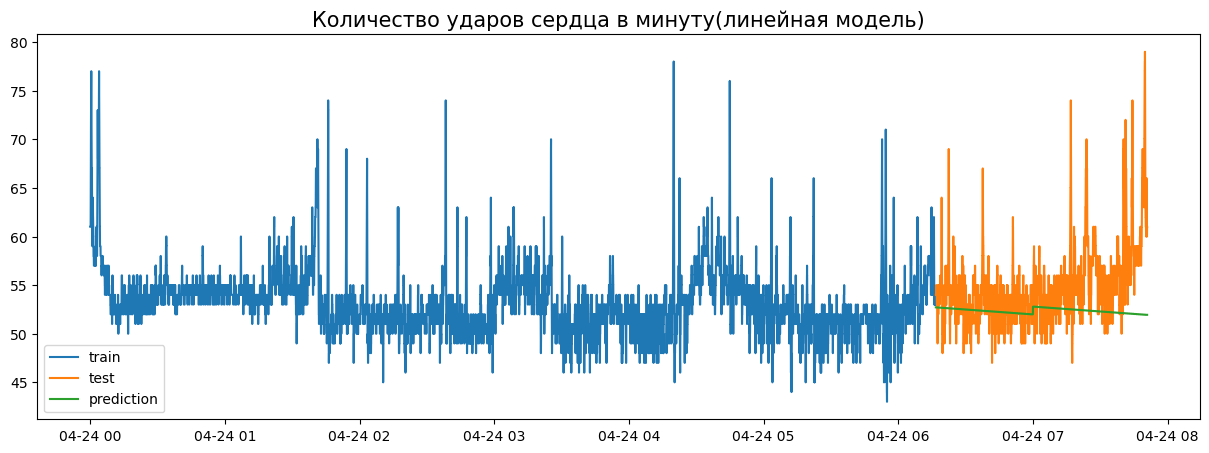

In [129]:
plot_results(y_train, y_test, lin_pred, name = '(линейная модель)')

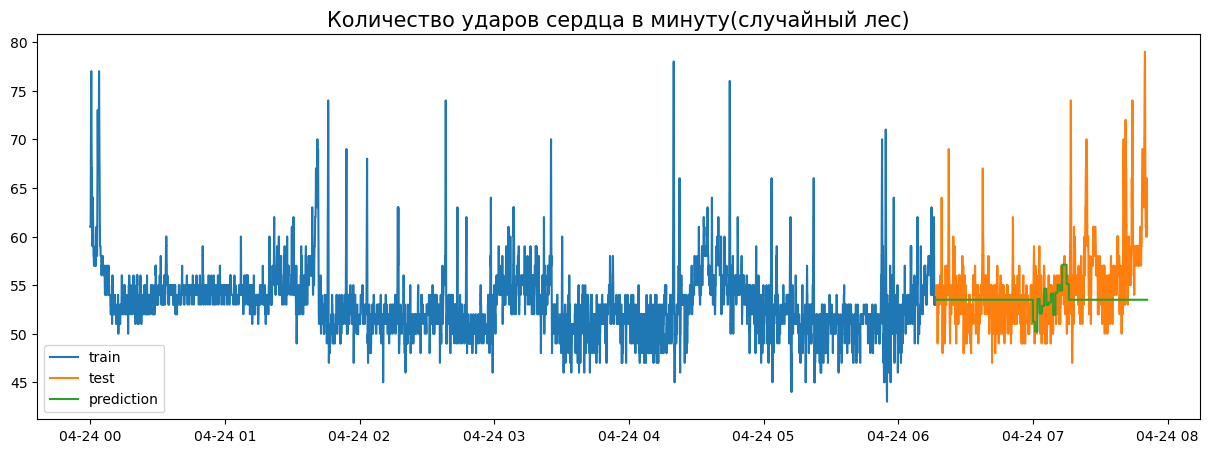

In [130]:
plot_results(y_train, y_test, forest_pred, name = '(случайный лес)')

Посчитайте метрики.

In [131]:
print(f'Случайный лес \n MAE: {round(mean_absolute_error(y_test, forest_pred), 6)} \n MSE: {round(mean_squared_error(y_test, forest_pred), 6)} \n MAPE: {round(mean_absolute_percentage_error(y_test, forest_pred), 6)} \n')
print(f'Линейная регрессия \n MAE: {round(mean_absolute_error(y_test, lin_pred), 6)} \n MSE: {round(mean_squared_error(y_test, lin_pred), 6)} \n MAPE: {round(mean_absolute_percentage_error(y_test, lin_pred), 6)} \n')

Случайный лес 
 MAE: 2.800655 
 MSE: 18.250306 
 MAPE: 0.048335 

Линейная регрессия 
 MAE: 3.233237 
 MSE: 23.090016 
 MAPE: 0.055396 



### 3. Временные сдвиги 

Поработаем еще с признаками. На этот раз добавим сдвиги по времени. Таким образом модель сможет использовать информацию из прошлого, для составления прогноза на будущее. Добавьте новые признаки к вашим данным.

In [122]:
def create_date_and_shifted_train_features(
    y_series, shifts=5, hour_shifts=1
):
    """
    Создает обучающий датасет из признаков, полученных из дат
    и значений ряда ранее.
    При этом используются значения ряда со сдвигами
    на неделю и год назад.

    Параметры:
        - y_series
            временной ряд.
        - shifts
            дневной сдвиг.
        - week_seasonal_shifts
            недельный сдвиг.
        - year_seasonal_shifts
            годовой сдвиг.
    """

    curr_df, y = create_only_date_train_features(y_series)
    curr_df.index = y_series.index

    # применяем сдвиг по минутам
    for shift in range(1, shifts + 1):
        curr_df[f"shift_{shift}"] = y_series.shift(shift * 60, axis=0)

    # применяем сдвиг по часам
    for shift in range(1, hour_shifts + 1):
        curr_df[f"hour_shift_{shift}"] = y_series.shift(
            shift * 60 * 60, axis=0
        )

    y = y_series

    # удалим первые строчки с nan
    drop_indices = curr_df.index[curr_df.isna().sum(axis=1) > 0]
    curr_df = curr_df.drop(index=drop_indices)
    y = y.drop(index=drop_indices)
    return curr_df, y

In [123]:
def date_and_shift_features_generator_for_test(date, previous_y):
    """Функция создания признаков из дат исдвигов ряда для тестовых дат"""

    row = create_date_features(date)
    for shift in range(1, SHIFT + 1):
        row[f"shift_{shift}"] = previous_y[-1 * shift * 60]
    for shift in range(1, HOUR_SHIFT+ 1):
        row[f"hour_shift_{shift}"] = previous_y[-1 * shift * 60 * 60]
    return row

In [124]:
SHIFT = 5  # минутный сдвиг
HOUT_SHIFT = 1  # часовой сдвиг

In [125]:
X_train, y_train = create_date_and_shifted_train_features(
    train,
    shifts=SHIFT,
    hour_shifts=HOUT_SHIFT
)

In [127]:
X_train

,minute,hour,shift_1,shift_2,shift_3,shift_4,shift_5,hour_shift_1
Time,,,,,,,,
2024-04-25 01:00:00,0,1,55.0,55.0,54.0,54.0,56.0,61.0
2024-04-25 01:00:01,0,1,55.0,55.0,54.0,54.0,56.0,61.0
2024-04-25 01:00:02,0,1,55.0,55.0,54.0,54.0,55.0,61.0
2024-04-25 01:00:03,0,1,55.0,55.0,54.0,54.0,55.0,61.0
2024-04-25 01:00:04,0,1,54.0,55.0,54.0,54.0,55.0,61.0
...,...,...,...,...,...,...,...,...
2024-04-25 06:16:39,16,6,54.0,57.0,57.0,53.0,56.0,51.0
2024-04-25 06:16:40,16,6,54.0,57.0,57.0,53.0,56.0,51.0
2024-04-25 06:16:41,16,6,54.0,58.0,57.0,53.0,57.0,51.0


Обучите линейную регрессию с регуляризацией и случайный лес на обновленном датасете.

In [128]:
lin = ElasticNet(l1_ratio= 0.5)
forest = RandomForestRegressor(n_estimators=300, random_state=42)
lin.fit(X_train, y_train)
forest.fit(X_train, y_train)

C:\Users\админ\AppData\Local\Temp\ipykernel_17832\853683387.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(X_train, y_train)


RandomForestRegressor(n_estimators=300, random_state=42)

In [129]:
forest_predictions = recursive_prediction(
    forest,
    test.index,
    train,
    date_and_shift_features_generator_for_test,
)

IndexError: list index out of range

In [114]:
lin_predict.shape

(4930, 10)

Визуализируйте полученные прогнозы.

ValueError: x and y must have same first dimension, but have shapes (5650,) and (4930, 10)

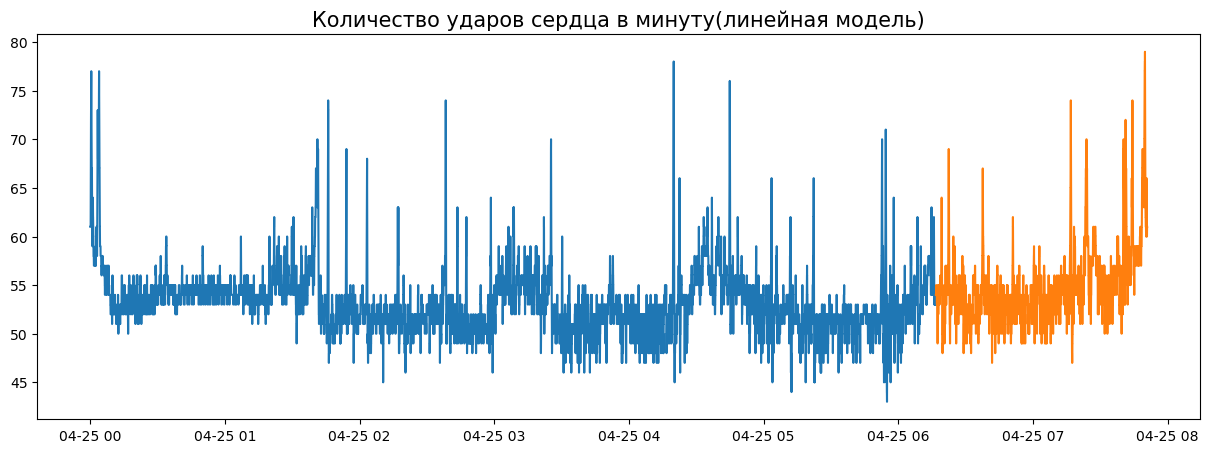

In [110]:
plot_results(train, test, lin_predict, name= '(линейная модель)')

Посчитайте метрики.

In [ ]:
<...>

Сделайте выводы по задаче.

**Вывод:**

Код с семинара не сработал. Я попытался его пофиксить несколько раз. По итогу мои нервы сдали и я оставил это задание пустым.

Чтобы здесь было не так пусто, я вставлю мем.

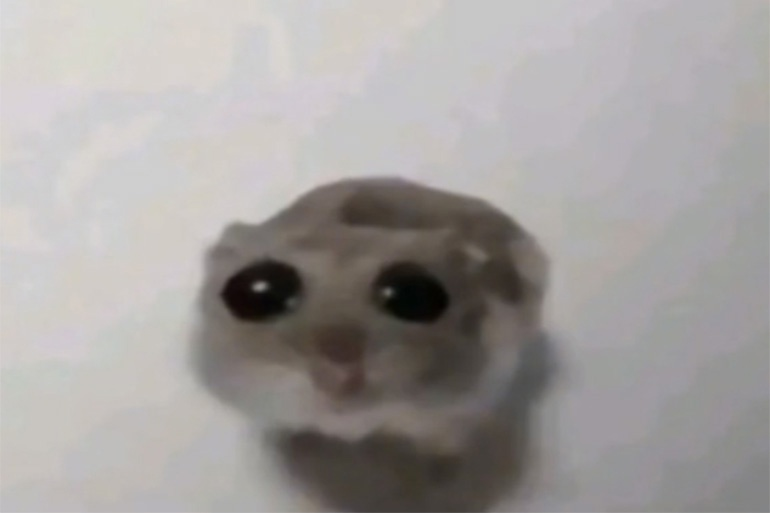

## Задача 3.

Используя функции, реализованные в задаче 1, добавьте сглаживание в ваш датасет. Поясните выбор функции сглаживания.

In [234]:
data_smoothing = double_exponential_smoothing(data, alpha= 0.1, beta = 0.05)

C:\Users\админ\AppData\Local\Temp\ipykernel_21968\1507379623.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  des[series.index[0]] = series.iloc[0]
C:\Users\админ\AppData\Local\Temp\ipykernel_21968\1507379623.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  des[series.index[i]] = trnd + lvl


In [235]:
train_smth = data_smoothing.iloc[:-5650]
test_smth = data_smoothing.iloc[-5650:]
X_train1, y_train1 = create_only_date_train_features(train_smth)
X_test1, y_test1 = create_only_date_train_features(test_smth)

Обучите линейную регрессию с регуляризацией и случайный лес на обновленном датасете.

In [236]:
lin = ElasticNet(l1_ratio=0.5)
forest = RandomForestRegressor(n_estimators= 300, random_state =42)

In [237]:
lin.fit(X_train1, y_train1)
forest.fit(X_train1, y_train1)

RandomForestRegressor(n_estimators=300, random_state=42)

In [238]:
lin_pred = lin.predict(X_test1)
forest_pred = forest.predict(X_test1)

Визуализируйте полученные прогнозы.

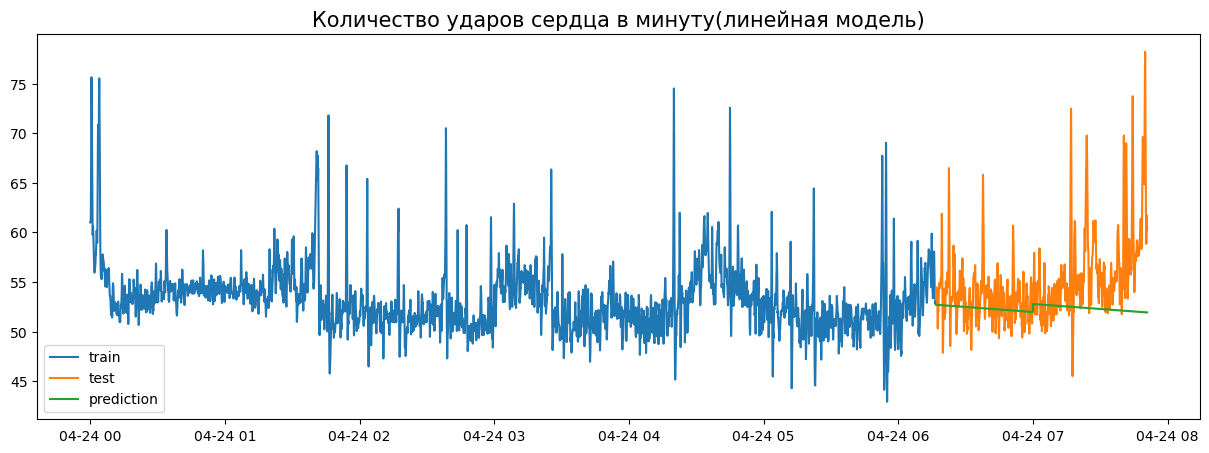

In [239]:
plot_results(y_train1, y_test1, lin_pred, name ='(линейная модель)')

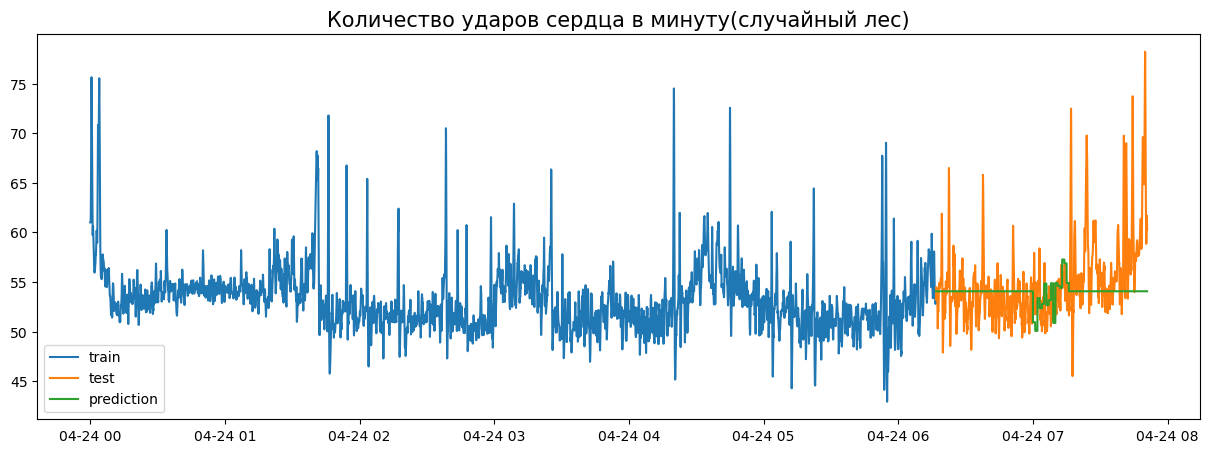

In [240]:
plot_results(y_train1, y_test1, forest_pred, name ='(случайный лес)')

Посчитайте метрики.

In [241]:
print(f'Случайный лес \n MAE: {round(mean_absolute_error(y_test1, forest_pred), 6)} \n MSE: {round(mean_squared_error(y_test1, forest_pred), 6)} \n MAPE: {round(mean_absolute_percentage_error(y_test1, forest_pred), 6)} \n')
print(f'Линейная регрессия \n MAE: {round(mean_absolute_error(y_test1, lin_pred), 6)} \n MSE: {round(mean_squared_error(y_test1, lin_pred), 6)} \n MAPE: {round(mean_absolute_percentage_error(y_test1, lin_pred), 6)} \n')

Случайный лес 
 MAE: 2.715658 
 MSE: 17.609118 
 MAPE: 0.046958 

Линейная регрессия 
 MAE: 3.173826 
 MSE: 23.771963 
 MAPE: 0.054064 



**Вывод:**

Двойное экспоненциальное сглаживание сохраняет больше информации о данных(всё таки компьютеру мы передаём цифры и лучше, если цифр больше). При этом судя по метрикам, предсказания модели улучшились.

## Задача 4.

Вспомним, что при построении деревьев в задаче регрессии для каждого листа вычисляется среднее по всем обучающим объектам, которые попали в данный лист. Тем самым значение в листе лежит в пределах области значений таргета на обучении (не превосходит максимального, не меньше минимального). В связи с этим деревья не могут предсказывать значения за пределами этой области. Зависимости в задачах временных рядов не редко имеют некоторый тренд, например, значения на тестовой части временного ряда могут оказаться вне области значений обучающей части ряда. Это означает, что решающее дерево не сможет построить хороший прогноз временного ряда. Проблема также распространяется на случайный лес. 

В данной задаче вы реализуете другой способ прогнозирования временных рядов, который может решить эту проблему.

Исследуйте `Ridge`, `Lasso` и `ElasticNet` с различными параметрами на данных из предыдущей задачи. Подберите лучшую линейную модель.

In [17]:
X_train, y_train = create_only_date_train_features(train)
X_test, y_test = create_only_date_train_features(test)

In [45]:
alphas = np.linspace(0, 1000, 10000)
errors_lasso = []
errors_ridge = []
errors_elastic = []

for alpha in alphas:
    ridge = Ridge(alpha= alpha)
    lasso = Lasso(alpha= alpha)
    elastic = ElasticNet(alpha= alpha, l1_ratio = 0.5)
    
    ridge.fit(X_train, y_train)
    lasso.fit(X_train, y_train)
    elastic.fit(X_train, y_train)

    y_pred_ridge = ridge.predict(X_test)
    y_pred_lasso = lasso.predict(X_test)
    y_pred_elastic = elastic.predict(X_test)

    errors_ridge.append(mean_absolute_error(y_test, y_pred_ridge))
    errors_lasso.append(mean_absolute_error(y_test, y_pred_lasso))
    errors_elastic.append(mean_absolute_error(y_test, y_pred_elastic))

C:\Users\админ\AppData\Local\Temp\ipykernel_1868\1933125027.py:12: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_train, y_train)
c:\Anaconda\envs\laba\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
c:\Anaconda\envs\laba\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.064e+05, tolerance: 2.257e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\ад

In [268]:
print(f'Минимальная ошибка: \n Ridge: {min(errors_ridge)} \n Lasso: {min(errors_lasso)} \n Elastic {min(errors_elastic)}')

Минимальная ошибка: 
 Ridge: 3.682656118492642 
 Lasso: 2.83127359399151 
 Elastic 2.83127359399151


In [276]:
print(min(alphas[errors_lasso == min(errors_lasso)]))

5.1005100510051005


Лучшая модель это Lasso с параметром регуляризации: $\alpha =5.1$.

Посчитайте остатки прогноза вашей модели на тренировочной выборке. Остатком является разность истинного значния и спрогнозированного.

In [19]:
lasso = Lasso(alpha = 5.1)
lasso.fit(X_train, y_train)
y_pred_train = lasso.predict(X_train)

In [36]:
remainder = y_train.to_numpy() - y_pred_train.reshape(-1, 1)

Теперь сделаем необычный ход &mdash; научим случайный лес предсказывать ошибку линейной модели. Для этого за `Х` возьмем исходные признаки, а за `y` - вектор разностей, который вы посчитали в ячейке выше.

In [39]:
error_forest = RandomForestRegressor(n_estimators = 300, random_state = 42)
error_forest.fit(X_train.to_numpy(), remainder)

C:\Users\админ\AppData\Local\Temp\ipykernel_1868\1115065364.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  error_forest.fit(X_train.to_numpy(), remainder)


RandomForestRegressor(n_estimators=300, random_state=42)

Предскажем ошибку линейной модели на тестовой выборке. Получим вектор предсказанных ошибок.

In [40]:
errors_pred = error_forest.predict(X_test)

c:\Anaconda\envs\laba\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Теперь сложим прогноз линейной модели для тестовой выборки и прогноз ошибок случайного леса для этой же тестовой выборки. Посчитайте метрики для полученного вектора.

In [41]:
lasso_pred = lasso.predict(X_test) + errors_pred

In [43]:
print(f' Метрики: \n MAE: {round(mean_absolute_error(y_test, lasso_pred), 6)} \n MSE: {round(mean_squared_error(y_test, lasso_pred), 6)} \n MAPE: {round(mean_absolute_percentage_error(y_test, lasso_pred), 6)} \n')

 Метрики: 
 MAE: 2.800736 
 MSE: 18.251216 
 MAPE: 0.048337 



Визуализируйте новый прогноз.

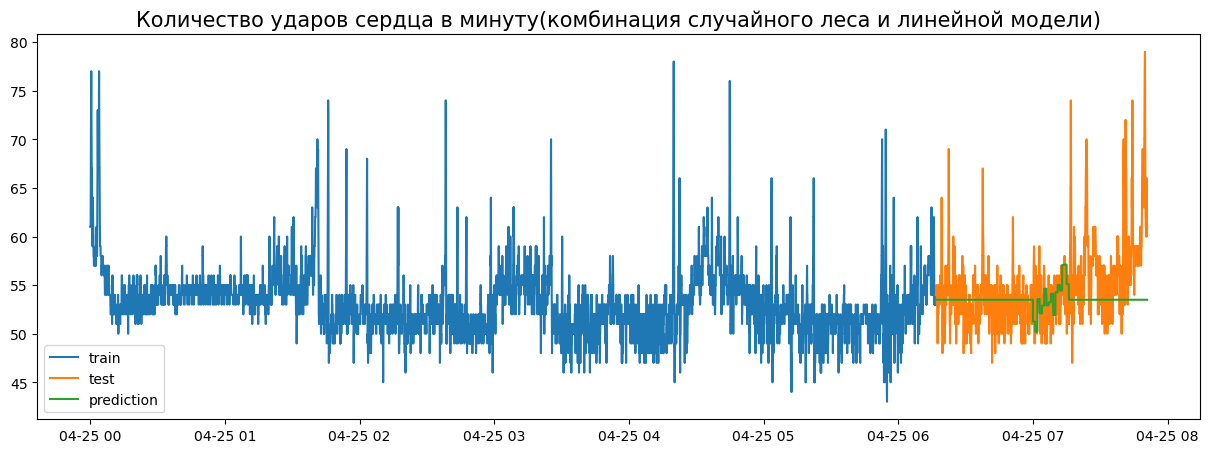

In [44]:
plot_results(y_train, y_test, lasso_pred, '(комбинация случайного леса и линейной модели)')

Сделайте вывод.

**Вывод:**

Проделанная процедура значительно уменьшила ошибку по сравнению с предсказаниями линейной модели(Для сравнения: 0.048337 и 0.055396). Возможно, можно ещё улучшить предсказания, если применить сглаживание(но я не стал этого делать, т.к. в задании не просили).  

Процедура, которую вы сейчас провели, называется **бустинг**. В этой модели последовательно объединяются деревья, которые учатся предсказывать ошибку предыдущего дерева. Благодаря такой схеме модели удается достичь высокого качества. Подробнее с бустингом мы ознакомимся в следующем семестре.